In [5]:
import numpy as np 
import pandas as pd
from sklearn.impute import KNNImputer

In [6]:
data_train = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\train.csv")
data_test = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\test.csv")
sample_submission = pd.read_csv("E:\\Lomba\\random_project\\House Prices Prediction\\house-prices-advanced-regression-techniques\\sample_submission.csv")

In [7]:
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [8]:
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [9]:
sample_submission

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

In [10]:
median_lotfrontage = data_train['LotFrontage'].median()
data_train['LotFrontage'].fillna(median_lotfrontage,inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1455         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1456         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1457         Lvl    AllPub  ...        0    NaN  GdPrv        Shed    2500   
1458         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1459         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2008        WD         Normal     208500  
1         5   2007        WD         Normal     181500  
2         9   2008        WD         Normal     223500  
3         2   2006        WD        Abnorml     140000  
4        12   2008        WD         Normal     250000  
...     ...    ...       ...            ...        ...  
1455      8   2007        WD         Normal     175000  
1456      2   2010        WD         Normal     210000  
1457      5   2010        WD         Normal     266500  
1458      4   2010        WD         Normal     142125  
1459      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [11]:
data_train['Alley'] = data_train['Alley'].fillna('NoAlleyAccess')
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [12]:
data_train['MasVnrType'] = data_train['MasVnrType'].fillna('None')
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [13]:
masvnrarea_mode = data_train['MasVnrArea'].mode().iloc[0]
data_train['MasVnrArea'].fillna(masvnrarea_mode,inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [14]:
data_train['BsmtQual'].fillna(data_train['BsmtQual'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [15]:

data_train['BsmtCond'].fillna(data_train['BsmtCond'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [16]:
data_train['BsmtExposure'].fillna(data_train['BsmtExposure'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [17]:

data_train['BsmtFinType1'].fillna(data_train['BsmtFinType1'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [18]:

data_train['BsmtFinType2'].fillna(data_train['BsmtFinType2'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [19]:
#Electrical
data_train['Electrical'].fillna(data_train['Electrical'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [20]:
data_train['FireplaceQu'].fillna('None',inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [21]:
#GarageType
data_train['GarageType'].fillna('None',inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [22]:
#GarageYrBlt
median_garage = data_train['GarageYrBlt'].median()
data_train['GarageYrBlt'].fillna(median_garage,inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [23]:
#GarageFinish
data_train['GarageFinish'].fillna(data_train['GarageFinish'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [24]:
#GarageQual
data_train['GarageQual'].fillna(data_train['GarageQual'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

In [25]:
#GarageCond
data_train['GarageCond'].fillna(data_train['GarageCond'].mode()[0],inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1         Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
2         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
3         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
4         IR1         Lvl    AllPub  ...        0    NaN    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1455      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0    NaN  MnPrv         NaN   
1457      Reg         Lvl    AllPub  ...        0    NaN  GdPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   
1459      Reg         Lvl    AllPub  ...        0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
0          0      2   2008        WD         Normal     208500  
1          0      5   2007        WD         Normal     181500  
2          0      9   2008        WD         Normal     223500  
3          0      2   2006        WD        Abnorml     140000  
4          0     12   2008        WD         Normal     250000  
...      ...    ...    ...       ...            ...        ...  
1455       0      8   2007        WD         Normal     175000  
1456       0      2   2010        WD         Normal     210000  
1457    2500      5   2010        WD         Normal     266500  
1458       0      4   2010        WD         Normal     142125  
1459       0      6   2008        WD         Normal     147500  

[1460 rows x 81 columns]

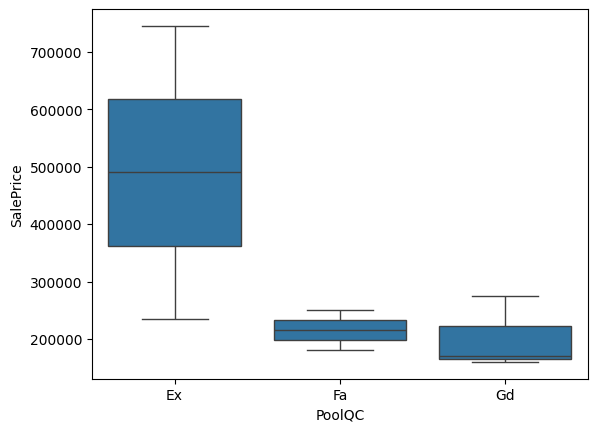

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None    NaN         NaN       0   
1         Reg         Lvl    AllPub  ...   None    NaN         NaN       0   
2         IR1         Lvl    AllPub  ...   None    NaN         NaN       0   
3         IR1         Lvl    AllPub  ...   None    NaN         NaN       0   
4         IR1         Lvl    AllPub  ...   None    NaN         NaN       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None    NaN         NaN       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv         NaN       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None    NaN         NaN       0   
1459      Reg         Lvl    AllPub  ...   None    NaN         NaN       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [26]:
#data_train.drop(columns='PoolQC')

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=data_train['PoolQC'], y=data_train['SalePrice'])
plt.show()
data_train['HasPool'] = data_train['PoolQC'].notnull().astype(int)
data_train['PoolQC'].fillna('None',inplace=True)
data_train


In [27]:
data_train['Fence'].fillna('None',inplace=True)
#data_train['HasFence'] = data_train['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None   None         NaN       0   
1         Reg         Lvl    AllPub  ...   None   None         NaN       0   
2         IR1         Lvl    AllPub  ...   None   None         NaN       0   
3         IR1         Lvl    AllPub  ...   None   None         NaN       0   
4         IR1         Lvl    AllPub  ...   None   None         NaN       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None   None         NaN       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv         NaN       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None   None         NaN       0   
1459      Reg         Lvl    AllPub  ...   None   None         NaN       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [28]:
data_train['MiscFeature'].fillna('None',inplace=True)
data_train

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60       RL         65.0     8450   Pave  NoAlleyAccess   
1        2          20       RL         80.0     9600   Pave  NoAlleyAccess   
2        3          60       RL         68.0    11250   Pave  NoAlleyAccess   
3        4          70       RL         60.0     9550   Pave  NoAlleyAccess   
4        5          60       RL         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1455  1456          60       RL         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20       RL         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70       RL         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20       RL         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20       RL         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None   None        None       0   
1         Reg         Lvl    AllPub  ...   None   None        None       0   
2         IR1         Lvl    AllPub  ...   None   None        None       0   
3         IR1         Lvl    AllPub  ...   None   None        None       0   
4         IR1         Lvl    AllPub  ...   None   None        None       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None   None        None       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv        None       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None   None        None       0   
1459      Reg         Lvl    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

# Encoding

In [29]:
from sklearn.preprocessing import LabelEncoder

In [30]:
le = LabelEncoder()

In [31]:
#MSZoning
data_train['MSZoning'] = le.fit_transform(data_train['MSZoning'])
data_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea Street          Alley  \
0        1          60         3         65.0     8450   Pave  NoAlleyAccess   
1        2          20         3         80.0     9600   Pave  NoAlleyAccess   
2        3          60         3         68.0    11250   Pave  NoAlleyAccess   
3        4          70         3         60.0     9550   Pave  NoAlleyAccess   
4        5          60         3         84.0    14260   Pave  NoAlleyAccess   
...    ...         ...       ...          ...      ...    ...            ...   
1455  1456          60         3         62.0     7917   Pave  NoAlleyAccess   
1456  1457          20         3         85.0    13175   Pave  NoAlleyAccess   
1457  1458          70         3         66.0     9042   Pave  NoAlleyAccess   
1458  1459          20         3         68.0     9717   Pave  NoAlleyAccess   
1459  1460          20         3         75.0     9937   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None   None        None       0   
1         Reg         Lvl    AllPub  ...   None   None        None       0   
2         IR1         Lvl    AllPub  ...   None   None        None       0   
3         IR1         Lvl    AllPub  ...   None   None        None       0   
4         IR1         Lvl    AllPub  ...   None   None        None       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None   None        None       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv        None       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None   None        None       0   
1459      Reg         Lvl    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [32]:
#Street
data_train['Street'] = le.fit_transform(data_train['Street'])
data_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street          Alley  \
0        1          60         3         65.0     8450       1  NoAlleyAccess   
1        2          20         3         80.0     9600       1  NoAlleyAccess   
2        3          60         3         68.0    11250       1  NoAlleyAccess   
3        4          70         3         60.0     9550       1  NoAlleyAccess   
4        5          60         3         84.0    14260       1  NoAlleyAccess   
...    ...         ...       ...          ...      ...     ...            ...   
1455  1456          60         3         62.0     7917       1  NoAlleyAccess   
1456  1457          20         3         85.0    13175       1  NoAlleyAccess   
1457  1458          70         3         66.0     9042       1  NoAlleyAccess   
1458  1459          20         3         68.0     9717       1  NoAlleyAccess   
1459  1460          20         3         75.0     9937       1  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None   None        None       0   
1         Reg         Lvl    AllPub  ...   None   None        None       0   
2         IR1         Lvl    AllPub  ...   None   None        None       0   
3         IR1         Lvl    AllPub  ...   None   None        None       0   
4         IR1         Lvl    AllPub  ...   None   None        None       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None   None        None       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv        None       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None   None        None       0   
1459      Reg         Lvl    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [33]:
#Alley
data_train['Alley'] = le.fit_transform(data_train['Alley'])
data_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      1   
1        2          20         3         80.0     9600       1      1   
2        3          60         3         68.0    11250       1      1   
3        4          70         3         60.0     9550       1      1   
4        5          60         3         84.0    14260       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      1   
1456  1457          20         3         85.0    13175       1      1   
1457  1458          70         3         66.0     9042       1      1   
1458  1459          20         3         68.0     9717       1      1   
1459  1460          20         3         75.0     9937       1      1   

     LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0         Reg         Lvl    AllPub  ...   None   None        None       0   
1         Reg         Lvl    AllPub  ...   None   None        None       0   
2         IR1         Lvl    AllPub  ...   None   None        None       0   
3         IR1         Lvl    AllPub  ...   None   None        None       0   
4         IR1         Lvl    AllPub  ...   None   None        None       0   
...       ...         ...       ...  ...    ...    ...         ...     ...   
1455      Reg         Lvl    AllPub  ...   None   None        None       0   
1456      Reg         Lvl    AllPub  ...   None  MnPrv        None       0   
1457      Reg         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458      Reg         Lvl    AllPub  ...   None   None        None       0   
1459      Reg         Lvl    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [34]:
#LotShape
data_train['LotShape'] = le.fit_transform(data_train['LotShape'])
data_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      1   
1        2          20         3         80.0     9600       1      1   
2        3          60         3         68.0    11250       1      1   
3        4          70         3         60.0     9550       1      1   
4        5          60         3         84.0    14260       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      1   
1456  1457          20         3         85.0    13175       1      1   
1457  1458          70         3         66.0     9042       1      1   
1458  1459          20         3         68.0     9717       1      1   
1459  1460          20         3         75.0     9937       1      1   

      LotShape LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0            3         Lvl    AllPub  ...   None   None        None       0   
1            3         Lvl    AllPub  ...   None   None        None       0   
2            0         Lvl    AllPub  ...   None   None        None       0   
3            0         Lvl    AllPub  ...   None   None        None       0   
4            0         Lvl    AllPub  ...   None   None        None       0   
...        ...         ...       ...  ...    ...    ...         ...     ...   
1455         3         Lvl    AllPub  ...   None   None        None       0   
1456         3         Lvl    AllPub  ...   None  MnPrv        None       0   
1457         3         Lvl    AllPub  ...   None  GdPrv        Shed    2500   
1458         3         Lvl    AllPub  ...   None   None        None       0   
1459         3         Lvl    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [35]:
#LandContour
data_train['LandContour'] = le.fit_transform(data_train['LandContour'])
data_train

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      1   
1        2          20         3         80.0     9600       1      1   
2        3          60         3         68.0    11250       1      1   
3        4          70         3         60.0     9550       1      1   
4        5          60         3         84.0    14260       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      1   
1456  1457          20         3         85.0    13175       1      1   
1457  1458          70         3         66.0     9042       1      1   
1458  1459          20         3         68.0     9717       1      1   
1459  1460          20         3         75.0     9937       1      1   

      LotShape  LandContour Utilities  ... PoolQC  Fence MiscFeature MiscVal  \
0            3            3    AllPub  ...   None   None        None       0   
1            3            3    AllPub  ...   None   None        None       0   
2            0            3    AllPub  ...   None   None        None       0   
3            0            3    AllPub  ...   None   None        None       0   
4            0            3    AllPub  ...   None   None        None       0   
...        ...          ...       ...  ...    ...    ...         ...     ...   
1455         3            3    AllPub  ...   None   None        None       0   
1456         3            3    AllPub  ...   None  MnPrv        None       0   
1457         3            3    AllPub  ...   None  GdPrv        Shed    2500   
1458         3            3    AllPub  ...   None   None        None       0   
1459         3            3    AllPub  ...   None   None        None       0   

     MoSold YrSold SaleType  SaleCondition  SalePrice  HasPool  
0         2   2008       WD         Normal     208500        0  
1         5   2007       WD         Normal     181500        0  
2         9   2008       WD         Normal     223500        0  
3         2   2006       WD        Abnorml     140000        0  
4        12   2008       WD         Normal     250000        0  
...     ...    ...      ...            ...        ...      ...  
1455      8   2007       WD         Normal     175000        0  
1456      2   2010       WD         Normal     210000        0  
1457      5   2010       WD         Normal     266500        0  
1458      4   2010       WD         Normal     142125        0  
1459      6   2008       WD         Normal     147500        0  

[1460 rows x 82 columns]

In [36]:
#Utilities
data_train['Utilities'] = le.fit_transform(data_train['Utilities'])
#LotConfig
data_train['LotConfig'] = le.fit_transform(data_train['LotConfig'])
#LandSlope
data_train['LandSlope'] = le.fit_transform(data_train['LandSlope'])
#Neighborhood
data_train['Neighborhood'] = le.fit_transform(data_train['Neighborhood'])
#Condition1
data_train['Condition1'] = le.fit_transform(data_train['Condition1'])
#Condition2
data_train['Condition2'] = le.fit_transform(data_train['Condition2'])
#BldgType
data_train['BldgType'] = le.fit_transform(data_train['BldgType'])
#HouseStyle
data_train['HouseStyle'] = le.fit_transform(data_train['HouseStyle'])
#RoofStyle
data_train['RoofStyle'] = le.fit_transform(data_train['RoofStyle'])
#RoofMatl
data_train['RoofMatl'] = le.fit_transform(data_train['RoofMatl'])
#Exterior1st
data_train['Exterior1st'] = le.fit_transform(data_train['Exterior1st'])
#Exterior2nd
data_train['Exterior2nd'] = le.fit_transform(data_train['Exterior2nd'])
#MasVnrType
data_train['MasVnrType'] = le.fit_transform(data_train['MasVnrType'])
#ExterQual
data_train['ExterQual'] = le.fit_transform(data_train['ExterQual'])
#ExterCond
data_train['ExterCond'] = le.fit_transform(data_train['ExterCond'])
#Foundation
data_train['Foundation'] = le.fit_transform(data_train['Foundation'])
#BsmtQual
data_train['BsmtQual'] = le.fit_transform(data_train['BsmtQual'])
#BsmtCond
data_train['BsmtCond'] = le.fit_transform(data_train['BsmtCond'])
#BsmtExposure
data_train['BsmtExposure'] = le.fit_transform(data_train['BsmtExposure'])
#BsmtFinType1
data_train['BsmtFinType1'] = le.fit_transform(data_train['BsmtFinType1'])
#BsmtFinType2
data_train['BsmtFinType2'] = le.fit_transform(data_train['BsmtFinType2'])
#Heating
data_train['Heating'] = le.fit_transform(data_train['Heating'])
#HeatingQC
data_train['HeatingQC'] = le.fit_transform(data_train['HeatingQC'])
#CentralAir
data_train['CentralAir'] = le.fit_transform(data_train['CentralAir'])
#Electrical
data_train['Electrical'] = le.fit_transform(data_train['Electrical'])
#KitchenQual
data_train['KitchenQual'] = le.fit_transform(data_train['KitchenQual'])
#Functional
data_train['Functional'] = le.fit_transform(data_train['Functional'])
#FireplaceQu
data_train['FireplaceQu'] = le.fit_transform(data_train['FireplaceQu'])
#GarageType
data_train['GarageType'] = le.fit_transform(data_train['GarageType'])
#GarageFinish
data_train['GarageFinish'] = le.fit_transform(data_train['GarageFinish'])
#GarageQual
data_train['GarageQual'] = le.fit_transform(data_train['GarageQual'])
#GarageCond
data_train['GarageCond'] = le.fit_transform(data_train['GarageCond'])
#PavedDrive
data_train['PavedDrive'] = le.fit_transform(data_train['PavedDrive'])
#PoolQC
data_train['PoolQC'] = le.fit_transform(data_train['PoolQC'])
#Fence
data_train['Fence'] = le.fit_transform(data_train['Fence'])
#MiscFeature
data_train['MiscFeature'] = le.fit_transform(data_train['MiscFeature'])
#SaleType
data_train['SaleType'] = le.fit_transform(data_train['SaleType'])
#SaleCondition
data_train['SaleCondition'] = le.fit_transform(data_train['SaleCondition'])

data_train


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0        1          60         3         65.0     8450       1      1   
1        2          20         3         80.0     9600       1      1   
2        3          60         3         68.0    11250       1      1   
3        4          70         3         60.0     9550       1      1   
4        5          60         3         84.0    14260       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1455  1456          60         3         62.0     7917       1      1   
1456  1457          20         3         85.0    13175       1      1   
1457  1458          70         3         66.0     9042       1      1   
1458  1459          20         3         68.0     9717       1      1   
1459  1460          20         3         75.0     9937       1      1   

      LotShape  LandContour  Utilities  ...  PoolQC  Fence  MiscFeature  \
0            3            3          0  ...       3      4            1   
1            3            3          0  ...       3      4            1   
2            0            3          0  ...       3      4            1   
3            0            3          0  ...       3      4            1   
4            0            3          0  ...       3      4            1   
...        ...          ...        ...  ...     ...    ...          ...   
1455         3            3          0  ...       3      4            1   
1456         3            3          0  ...       3      2            1   
1457         3            3          0  ...       3      0            3   
1458         3            3          0  ...       3      4            1   
1459         3            3          0  ...       3      4            1   

      MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  HasPool  
0           0       2    2008         8              4     208500        0  
1           0       5    2007         8              4     181500        0  
2           0       9    2008         8              4     223500        0  
3           0       2    2006         8              0     140000        0  
4           0      12    2008         8              4     250000        0  
...       ...     ...     ...       ...            ...        ...      ...  
1455        0       8    2007         8              4     175000        0  
1456        0       2    2010         8              4     210000        0  
1457     2500       5    2010         8              4     266500        0  
1458        0       4    2010         8              4     142125        0  
1459        0       6    2008         8              4     147500        0  

[1460 rows x 82 columns]

In [37]:
data_train.to_csv('prepo_datatrain.csv',index=False)

# Data test

In [38]:
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [39]:
median_lotfrontage = data_test['LotFrontage'].median()
data_test['LotFrontage'].fillna(median_lotfrontage,inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [40]:
data_test['Alley'] = data_test['Alley'].fillna('NoAlleyAccess')
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [41]:
data_test['MasVnrType'] = data_test['MasVnrType'].fillna('None')
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [42]:
masvnrarea_mode_test = data_test['MasVnrArea'].mode().iloc[0]
data_test['MasVnrArea'].fillna(masvnrarea_mode_test,inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [43]:
data_test['BsmtQual'].fillna(data_test['BsmtQual'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [44]:
data_test['BsmtCond'].fillna(data_test['BsmtCond'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [45]:
data_test['BsmtExposure'].fillna(data_test['BsmtExposure'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [46]:
data_test['BsmtFinType1'].fillna(data_test['BsmtFinType1'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [47]:
data_test['BsmtFinType2'].fillna(data_test['BsmtFinType2'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [48]:
data_test['Electrical'].fillna(data_test['Electrical'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [49]:
data_test['FireplaceQu'].fillna('None',inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [50]:
data_test['GarageType'].fillna('None',inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [51]:
median_garage_test = data_test['GarageYrBlt'].median()
data_test['GarageYrBlt'].fillna(median_garage_test,inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [52]:
data_test['GarageFinish'].fillna(data_test['GarageFinish'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [53]:
data_test['GarageQual'].fillna(data_test['GarageQual'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [54]:
data_test['GarageCond'].fillna(data_test['GarageCond'].mode()[0],inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0         Reg         Lvl    AllPub  ...         120        0    NaN  MnPrv   
1         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
2         IR1         Lvl    AllPub  ...           0        0    NaN  MnPrv   
3         IR1         Lvl    AllPub  ...           0        0    NaN    NaN   
4         IR1         HLS    AllPub  ...         144        0    NaN    NaN   
...       ...         ...       ...  ...         ...      ...    ...    ...   
1454      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1455      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1456      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   
1457      Reg         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458      Reg         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

#sns.boxplot(x=data_test['PoolQC'], y=data_test['SalePrice'])
#plt.show()
data_test['HasPool'] = data_test['PoolQC'].notnull().astype(int)
data_test['PoolQC'].fillna('None',inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv         NaN   
1         IR1         Lvl    AllPub  ...        0   None    NaN        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv         NaN   
3         IR1         Lvl    AllPub  ...        0   None    NaN         NaN   
4         IR1         HLS    AllPub  ...        0   None    NaN         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None    NaN         NaN   
1455      Reg         Lvl    AllPub  ...        0   None    NaN         NaN   
1456      Reg         Lvl    AllPub  ...        0   None    NaN         NaN   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [56]:
data_test['Fence'].fillna('None',inplace=True)
#data_train['HasFence'] = data_train['Fence'].apply(lambda x: 0 if pd.isnull(x) else 1)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv         NaN   
1         IR1         Lvl    AllPub  ...        0   None   None        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv         NaN   
3         IR1         Lvl    AllPub  ...        0   None   None         NaN   
4         IR1         HLS    AllPub  ...        0   None   None         NaN   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None   None         NaN   
1455      Reg         Lvl    AllPub  ...        0   None   None         NaN   
1456      Reg         Lvl    AllPub  ...        0   None   None         NaN   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None   None         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [57]:
data_test['MiscFeature'].fillna('None',inplace=True)
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20       RH         80.0    11622   Pave  NoAlleyAccess   
1     1462          20       RL         81.0    14267   Pave  NoAlleyAccess   
2     1463          60       RL         74.0    13830   Pave  NoAlleyAccess   
3     1464          60       RL         78.0     9978   Pave  NoAlleyAccess   
4     1465         120       RL         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...      ...          ...      ...    ...            ...   
1454  2915         160       RM         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160       RM         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20       RL        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85       RL         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60       RL         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv        None   
1         IR1         Lvl    AllPub  ...        0   None   None        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv        None   
3         IR1         Lvl    AllPub  ...        0   None   None        None   
4         IR1         HLS    AllPub  ...        0   None   None        None   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None   None        None   
1455      Reg         Lvl    AllPub  ...        0   None   None        None   
1456      Reg         Lvl    AllPub  ...        0   None   None        None   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

# Encoding test

In [58]:
data_test['MSZoning'] = le.fit_transform(data_test['MSZoning'])
data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea Street          Alley  \
0     1461          20         2         80.0    11622   Pave  NoAlleyAccess   
1     1462          20         3         81.0    14267   Pave  NoAlleyAccess   
2     1463          60         3         74.0    13830   Pave  NoAlleyAccess   
3     1464          60         3         78.0     9978   Pave  NoAlleyAccess   
4     1465         120         3         43.0     5005   Pave  NoAlleyAccess   
...    ...         ...       ...          ...      ...    ...            ...   
1454  2915         160         4         21.0     1936   Pave  NoAlleyAccess   
1455  2916         160         4         21.0     1894   Pave  NoAlleyAccess   
1456  2917          20         3        160.0    20000   Pave  NoAlleyAccess   
1457  2918          85         3         62.0    10441   Pave  NoAlleyAccess   
1458  2919          60         3         74.0     9627   Pave  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv        None   
1         IR1         Lvl    AllPub  ...        0   None   None        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv        None   
3         IR1         Lvl    AllPub  ...        0   None   None        None   
4         IR1         HLS    AllPub  ...        0   None   None        None   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None   None        None   
1455      Reg         Lvl    AllPub  ...        0   None   None        None   
1456      Reg         Lvl    AllPub  ...        0   None   None        None   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [59]:
data_test['Street'] = le.fit_transform(data_test['Street'])
data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street          Alley  \
0     1461          20         2         80.0    11622       1  NoAlleyAccess   
1     1462          20         3         81.0    14267       1  NoAlleyAccess   
2     1463          60         3         74.0    13830       1  NoAlleyAccess   
3     1464          60         3         78.0     9978       1  NoAlleyAccess   
4     1465         120         3         43.0     5005       1  NoAlleyAccess   
...    ...         ...       ...          ...      ...     ...            ...   
1454  2915         160         4         21.0     1936       1  NoAlleyAccess   
1455  2916         160         4         21.0     1894       1  NoAlleyAccess   
1456  2917          20         3        160.0    20000       1  NoAlleyAccess   
1457  2918          85         3         62.0    10441       1  NoAlleyAccess   
1458  2919          60         3         74.0     9627       1  NoAlleyAccess   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv        None   
1         IR1         Lvl    AllPub  ...        0   None   None        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv        None   
3         IR1         Lvl    AllPub  ...        0   None   None        None   
4         IR1         HLS    AllPub  ...        0   None   None        None   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None   None        None   
1455      Reg         Lvl    AllPub  ...        0   None   None        None   
1456      Reg         Lvl    AllPub  ...        0   None   None        None   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [60]:
data_test['Alley'] = le.fit_transform(data_test['Alley'])
data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      1   
1     1462          20         3         81.0    14267       1      1   
2     1463          60         3         74.0    13830       1      1   
3     1464          60         3         78.0     9978       1      1   
4     1465         120         3         43.0     5005       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      1   
1455  2916         160         4         21.0     1894       1      1   
1456  2917          20         3        160.0    20000       1      1   
1457  2918          85         3         62.0    10441       1      1   
1458  2919          60         3         74.0     9627       1      1   

     LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0         Reg         Lvl    AllPub  ...        0   None  MnPrv        None   
1         IR1         Lvl    AllPub  ...        0   None   None        Gar2   
2         IR1         Lvl    AllPub  ...        0   None  MnPrv        None   
3         IR1         Lvl    AllPub  ...        0   None   None        None   
4         IR1         HLS    AllPub  ...        0   None   None        None   
...       ...         ...       ...  ...      ...    ...    ...         ...   
1454      Reg         Lvl    AllPub  ...        0   None   None        None   
1455      Reg         Lvl    AllPub  ...        0   None   None        None   
1456      Reg         Lvl    AllPub  ...        0   None   None        None   
1457      Reg         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458      Reg         Lvl    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [61]:
data_test['LotShape'] = le.fit_transform(data_test['LotShape'])
data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      1   
1     1462          20         3         81.0    14267       1      1   
2     1463          60         3         74.0    13830       1      1   
3     1464          60         3         78.0     9978       1      1   
4     1465         120         3         43.0     5005       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      1   
1455  2916         160         4         21.0     1894       1      1   
1456  2917          20         3        160.0    20000       1      1   
1457  2918          85         3         62.0    10441       1      1   
1458  2919          60         3         74.0     9627       1      1   

      LotShape LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0            3         Lvl    AllPub  ...        0   None  MnPrv        None   
1            0         Lvl    AllPub  ...        0   None   None        Gar2   
2            0         Lvl    AllPub  ...        0   None  MnPrv        None   
3            0         Lvl    AllPub  ...        0   None   None        None   
4            0         HLS    AllPub  ...        0   None   None        None   
...        ...         ...       ...  ...      ...    ...    ...         ...   
1454         3         Lvl    AllPub  ...        0   None   None        None   
1455         3         Lvl    AllPub  ...        0   None   None        None   
1456         3         Lvl    AllPub  ...        0   None   None        None   
1457         3         Lvl    AllPub  ...        0   None  MnPrv        Shed   
1458         3         Lvl    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [62]:
data_test['LandContour'] = le.fit_transform(data_test['LandContour'])
data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      1   
1     1462          20         3         81.0    14267       1      1   
2     1463          60         3         74.0    13830       1      1   
3     1464          60         3         78.0     9978       1      1   
4     1465         120         3         43.0     5005       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      1   
1455  2916         160         4         21.0     1894       1      1   
1456  2917          20         3        160.0    20000       1      1   
1457  2918          85         3         62.0    10441       1      1   
1458  2919          60         3         74.0     9627       1      1   

      LotShape  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature  \
0            3            3    AllPub  ...        0   None  MnPrv        None   
1            0            3    AllPub  ...        0   None   None        Gar2   
2            0            3    AllPub  ...        0   None  MnPrv        None   
3            0            3    AllPub  ...        0   None   None        None   
4            0            1    AllPub  ...        0   None   None        None   
...        ...          ...       ...  ...      ...    ...    ...         ...   
1454         3            3    AllPub  ...        0   None   None        None   
1455         3            3    AllPub  ...        0   None   None        None   
1456         3            3    AllPub  ...        0   None   None        None   
1457         3            3    AllPub  ...        0   None  MnPrv        Shed   
1458         3            3    AllPub  ...        0   None   None        None   

     MiscVal MoSold YrSold  SaleType  SaleCondition  HasPool  
0          0      6   2010        WD         Normal        0  
1      12500      6   2010        WD         Normal        0  
2          0      3   2010        WD         Normal        0  
3          0      6   2010        WD         Normal        0  
4          0      1   2010        WD         Normal        0  
...      ...    ...    ...       ...            ...      ...  
1454       0      6   2006        WD         Normal        0  
1455       0      4   2006        WD        Abnorml        0  
1456       0      9   2006        WD        Abnorml        0  
1457     700      7   2006        WD         Normal        0  
1458       0     11   2006        WD         Normal        0  

[1459 rows x 81 columns]

In [63]:
#Utilities
data_test['Utilities'] = le.fit_transform(data_test['Utilities'])
#LotConfig
data_test['LotConfig'] = le.fit_transform(data_test['LotConfig'])
#LandSlope
data_test['LandSlope'] = le.fit_transform(data_test['LandSlope'])
#Neighborhood
data_test['Neighborhood'] = le.fit_transform(data_test['Neighborhood'])
#Condition1
data_test['Condition1'] = le.fit_transform(data_test['Condition1'])
#Condition2
data_test['Condition2'] = le.fit_transform(data_test['Condition2'])
#BldgType
data_test['BldgType'] = le.fit_transform(data_test['BldgType'])
#HouseStyle
data_test['HouseStyle'] = le.fit_transform(data_test['HouseStyle'])
#RoofStyle
data_test['RoofStyle'] = le.fit_transform(data_test['RoofStyle'])
#RoofMatl
data_test['RoofMatl'] = le.fit_transform(data_test['RoofMatl'])
#Exterior1st
data_test['Exterior1st'] = le.fit_transform(data_test['Exterior1st'])
#Exterior2nd
data_test['Exterior2nd'] = le.fit_transform(data_test['Exterior2nd'])
#MasVnrType
data_test['MasVnrType'] = le.fit_transform(data_test['MasVnrType'])
#ExterQual
data_test['ExterQual'] = le.fit_transform(data_test['ExterQual'])
#ExterCond
data_test['ExterCond'] = le.fit_transform(data_test['ExterCond'])
#Foundation
data_test['Foundation'] = le.fit_transform(data_test['Foundation'])
#BsmtQual
data_test['BsmtQual'] = le.fit_transform(data_test['BsmtQual'])
#BsmtCond
data_test['BsmtCond'] = le.fit_transform(data_test['BsmtCond'])
#BsmtExposure
data_test['BsmtExposure'] = le.fit_transform(data_test['BsmtExposure'])
#BsmtFinType1
data_test['BsmtFinType1'] = le.fit_transform(data_test['BsmtFinType1'])
#BsmtFinType2
data_test['BsmtFinType2'] = le.fit_transform(data_test['BsmtFinType2'])
#Heating
data_test['Heating'] = le.fit_transform(data_test['Heating'])
#HeatingQC
data_test['HeatingQC'] = le.fit_transform(data_test['HeatingQC'])
#CentralAir
data_test['CentralAir'] = le.fit_transform(data_test['CentralAir'])
#Electrical
data_test['Electrical'] = le.fit_transform(data_test['Electrical'])
#KitchenQual
data_test['KitchenQual'] = le.fit_transform(data_test['KitchenQual'])
#Functional
data_test['Functional'] = le.fit_transform(data_test['Functional'])
#FireplaceQu
data_test['FireplaceQu'] = le.fit_transform(data_test['FireplaceQu'])
#GarageType
data_test['GarageType'] = le.fit_transform(data_test['GarageType'])
#GarageFinish
data_test['GarageFinish'] = le.fit_transform(data_test['GarageFinish'])
#GarageQual
data_test['GarageQual'] = le.fit_transform(data_test['GarageQual'])
#GarageCond
data_test['GarageCond'] = le.fit_transform(data_test['GarageCond'])
#PavedDrive
data_test['PavedDrive'] = le.fit_transform(data_test['PavedDrive'])
#PoolQC
data_test['PoolQC'] = le.fit_transform(data_test['PoolQC'])
#Fence
data_test['Fence'] = le.fit_transform(data_test['Fence'])
#MiscFeature
data_test['MiscFeature'] = le.fit_transform(data_test['MiscFeature'])
#SaleType
data_test['SaleType'] = le.fit_transform(data_test['SaleType'])
#SaleCondition
data_test['SaleCondition'] = le.fit_transform(data_test['SaleCondition'])

data_test

Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0     1461          20         2         80.0    11622       1      1   
1     1462          20         3         81.0    14267       1      1   
2     1463          60         3         74.0    13830       1      1   
3     1464          60         3         78.0     9978       1      1   
4     1465         120         3         43.0     5005       1      1   
...    ...         ...       ...          ...      ...     ...    ...   
1454  2915         160         4         21.0     1936       1      1   
1455  2916         160         4         21.0     1894       1      1   
1456  2917          20         3        160.0    20000       1      1   
1457  2918          85         3         62.0    10441       1      1   
1458  2919          60         3         74.0     9627       1      1   

      LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0            3            3          0  ...         0       2      2   
1            0            3          0  ...         0       2      4   
2            0            3          0  ...         0       2      2   
3            0            3          0  ...         0       2      4   
4            0            1          0  ...         0       2      4   
...        ...          ...        ...  ...       ...     ...    ...   
1454         3            3          0  ...         0       2      4   
1455         3            3          0  ...         0       2      4   
1456         3            3          0  ...         0       2      4   
1457         3            3          0  ...         0       2      2   
1458         3            3          0  ...         0       2      4   

      MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  HasPool  
0               1        0       6    2010         8              4        0  
1               0    12500       6    2010         8              4        0  
2               1        0       3    2010         8              4        0  
3               1        0       6    2010         8              4        0  
4               1        0       1    2010         8              4        0  
...           ...      ...     ...     ...       ...            ...      ...  
1454            1        0       6    2006         8              4        0  
1455            1        0       4    2006         8              0        0  
1456            1        0       9    2006         8              0        0  
1457            3      700       7    2006         8              4        0  
1458            1        0      11    2006         8              4        0  

[1459 rows x 81 columns]

In [64]:
data_test.to_csv('prepo_datatest.csv',index=False)